In [22]:
using Plots
using LaTeXStrings

In [2]:
function integrate_(f,a,b)          #Simpson integration for vector function
    n=length(f)-1
    h=(b-a)/n
    I= h/3*(f[1]+2*sum(f[3:2:end-2])+4*sum(f[2:2:end])+f[end])
    return I
end

integrate_ (generic function with 1 method)

In [3]:
function DM_LSS(Z,H0)
c=3e8                  
G=6.6743e-11             
Omega_b=0.05     
Omega_m=0.315     
Xe=0.88                  
fIGM=0.84                
mp=1.67e-27              
dz=0.00001                
z=0:dz:Z              
integrand = @. (1+z)/sqrt((1+z)^3*Omega_m + 1-Omega_m) 
intg=integrate_(integrand,0,Z)                                          
coeff=3*c*H0*Omega_b*Xe*fIGM*3.2404e-20/(8*pi*G*mp)             
return coeff*intg*3.24e-23                                 
end


DM_LSS (generic function with 1 method)

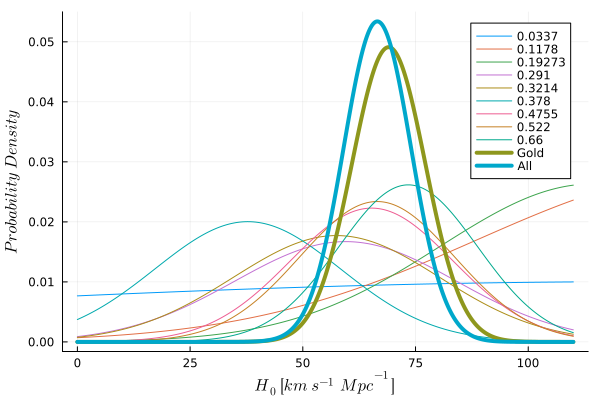

For Gold : 69.0
For All : 66.5


In [32]:
Z=[0.0337,0.1178,0.19273,0.291,0.3214,0.378,0.4755,0.522,0.66]
DM=[348.81,338.75,558.3,363.63,361.426,321.42,589.273,593.14,760.86]
MWDM=[199,37.2,188,57.3,40.5,57.8,102,56.4,37]
H0=0:0.1:110

LIKELI=ones(length(H0))
p=plot()
Likelihood=[]
Sig=[]
for i=1:9
    z=Z[i]
    lss(H0)=DM_LSS(z,H0)
    tot_DM=DM[i]
    mw_DM=MWDM[i]

    host_DM=100/(1+z) 
    sigma_lss=40+140*z 
    sigma_mw=30
    sigma_host=50/(1+z) 
    sigma=sqrt(sigma_lss^2+sigma_mw^2+sigma_host^2)
    global Sig=append!(Sig,sigma)
    L(H0) = exp(-(tot_DM-mw_DM-host_DM-lss(H0))^2/(2*sigma^2))/sqrt(2*pi*sigma^2)
    l=@. L(H0)
    Likelihood=push!(Likelihood,l)
    plot!(p,H0,l/integrate_(l,0,110),label=z)  
end
Gold=Likelihood[3].*Likelihood[4].*Likelihood[5].*Likelihood[7].*Likelihood[8].*Likelihood[9]
plot!(p,H0,Gold/integrate_(Gold,0,110),linewidth=4,label="Gold")                       # Plotting the joint likelihood 
All=Likelihood[1].*Likelihood[2].*Likelihood[3].*Likelihood[4].*Likelihood[5].*Likelihood[6].*Likelihood[7].*Likelihood[8].*Likelihood[9]
plot!(p,H0,All/integrate_(All,0,110),linewidth=4,label="All",xlabel=("\$H_0\\ [km\\ s^{-1}\\ {Mpc}^{-1}]\$"),ylabel=("\$Probability\\ Density\$"))  
display(p)
#xlims!(0.3,110)
println("For Gold : ",H0[argmax(Gold)])
println("For All : ",H0[argmax(All)])

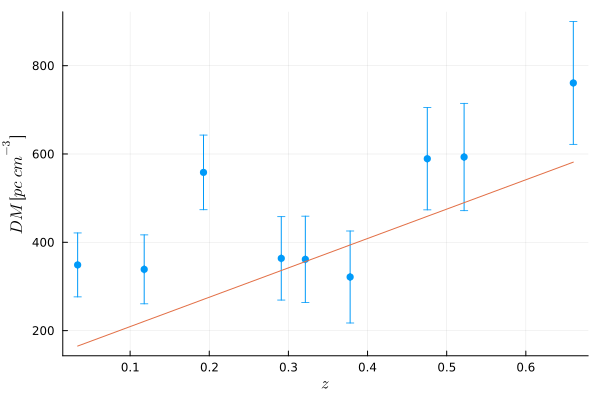

In [42]:
sigma_y = Sig
scatter(Z,DM, xerr=0 , yerr = sigma_y, msc = 1, label = "")
x=Z
host_DM=100 ./(1 .+Z)
y = DM_LSS.(Z,62.3).+MWDM
Ly=length(y)
Y=y
A=hcat(ones(length(x)),x)
C=zeros(Ly,Ly)
for i in 1:Ly
    C[i,i]=sigma_y[i]
end
X=(inv(A'*inv(C)*A))*(A'*inv(C)*Y)
plot!(x, X[2]*x.+X[1],xlabel=("\$z\$"),ylabel=("\$DM\\ [pc\\ {cm}^{-3}]\$"),legend=false)
